In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 37.9 MB/s 
     |████████████████████████████████| 1.7 MB 32.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 37.6 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 15.5 MB 35.0 MB/s 
     |████████████████████████████████| 113 kB 52.0 MB/s 
     |████████████████████████████████| 167 kB 42.9 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 6.8 MB 46.3 MB/s 
     |████████████████████████████████| 2.0 MB 60.1 MB/s 
     |████████████████████████████████| 261 kB 58.3 MB/s 
     |████████████████████████████████| 3.1 MB 52.1 MB/s 
     |████████████████████████████████| 675 kB 48.6 MB/s 
     |████████████████████████████████| 62 kB 682 kB/s 
     |██████████████████

In [3]:
from pycaret.datasets import get_data
juice = get_data('juice')
juice

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [4]:
from pycaret.classification import *
exp_name = setup(data = juice,  target = 'Purchase')
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8449,0.8958,0.7810,0.8294,0.8008,0.6744,0.6787,0.429
ridge,Ridge Classifier,0.8395,0.0000,0.7778,0.8187,0.7945,0.6635,0.6673,0.014
lda,Linear Discriminant Analysis,0.8395,0.8959,0.7845,0.8146,0.7956,0.6641,0.6681,0.018
gbc,Gradient Boosting Classifier,0.8222,0.8911,0.7878,0.7784,0.7783,0.6305,0.6354,0.133
lightgbm,Light Gradient Boosting Machine,0.8075,0.8868,0.7612,0.7692,0.7586,0.5994,0.6052,0.094
ada,Ada Boost Classifier,0.8074,0.8713,0.7213,0.7859,0.7467,0.5930,0.5984,0.119
rf,Random Forest Classifier,0.7901,0.8719,0.7212,0.7565,0.7322,0.5608,0.5664,0.517
nb,Naive Bayes,0.7634,0.8330,0.7776,0.6838,0.7266,0.5200,0.5244,0.016
et,Extra Trees Classifier,0.7621,0.8271,0.6782,0.7252,0.6950,0.5013,0.5074,0.464
dt,Decision Tree Classifier,0.7594,0.7526,0.6981,0.7129,0.6954,0.4981,0.5066,0.019


In [5]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8875, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

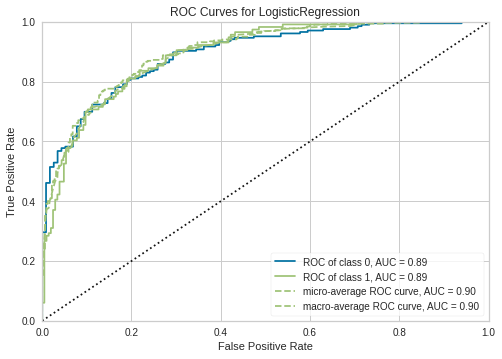

In [10]:
plot_model(best_model, plot = 'auc')

In [8]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9230,0.8333,0.8333,0.8333,0.7222,0.7222
1,0.8533,0.9170,0.7667,0.8519,0.8070,0.6893,0.6918
2,0.9067,0.9407,0.9000,0.8710,0.8852,0.8066,0.8069
3,0.8800,0.9319,0.9333,0.8000,0.8615,0.7568,0.7638
4,0.8400,0.9289,0.7667,0.8214,0.7931,0.6629,0.6640
5,0.8133,0.8593,0.8000,0.7500,0.7742,0.6154,0.6163
6,0.8533,0.9193,0.7667,0.8519,0.8070,0.6893,0.6918
7,0.7867,0.7705,0.6774,0.7778,0.7241,0.5516,0.5551
8,0.8514,0.8705,0.6333,1.0000,0.7755,0.6726,0.7118
9,0.8108,0.8970,0.8000,0.7500,0.7742,0.6117,0.6126


In [9]:
tuned_best_model

LogisticRegression(C=4.078, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8875, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

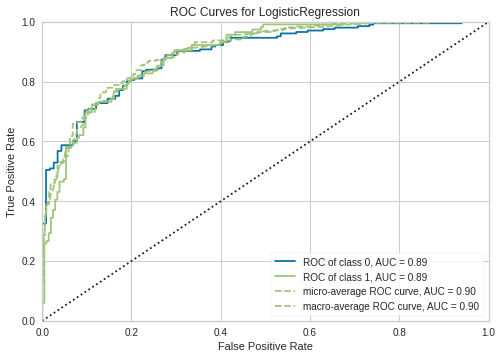

In [11]:
plot_model(tuned_best_model, plot = 'auc')

In [12]:
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9252,0.8333,0.8333,0.8333,0.7222,0.7222
1,0.8533,0.9133,0.7667,0.8519,0.8070,0.6893,0.6918
2,0.9067,0.9393,0.9000,0.8710,0.8852,0.8066,0.8069
3,0.8667,0.9341,0.9000,0.7941,0.8438,0.7283,0.7326
4,0.8400,0.9304,0.7667,0.8214,0.7931,0.6629,0.6640
5,0.8133,0.8622,0.8000,0.7500,0.7742,0.6154,0.6163
6,0.8533,0.9148,0.7667,0.8519,0.8070,0.6893,0.6918
7,0.8000,0.7705,0.7097,0.7857,0.7458,0.5816,0.5837
8,0.8514,0.8735,0.6333,1.0000,0.7755,0.6726,0.7118
9,0.8108,0.9015,0.8000,0.7500,0.7742,0.6117,0.6126


In [13]:
best_auc_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.001,
                           solver='lsqr', store_covariance=False, tol=0.0001)

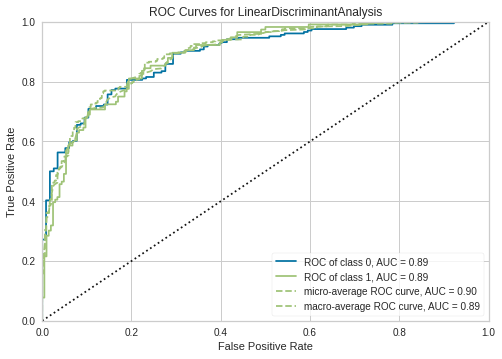

In [14]:
plot_model(best_auc_model, plot = 'auc')